# COVID-19 Italian Data Preliminary Analysis  

In [70]:
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns; sns.set(rc={'figure.figsize':(15, 12)})

In [91]:
data_dir = Path(".") / "data" 
national = data_dir / "dati-andamento-nazionale" / "dpc-covid19-ita-andamento-nazionale.csv"
df = pd.read_csv(file, index_col=0,parse_dates=[0])

In [92]:
df.head()

,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
data,,,,,,,,,,,
2020-02-24 18:00:00,ITA,101,26,127,94,221,221,1,7,229,4324
2020-02-25 18:00:00,ITA,114,35,150,162,311,90,1,10,322,8623
2020-02-26 18:00:00,ITA,128,36,164,221,385,74,3,12,400,9587
2020-02-27 18:00:00,ITA,248,56,304,284,588,203,45,17,650,12014
2020-02-28 18:00:00,ITA,345,64,409,412,821,233,46,21,888,15695


In [93]:
df = df.drop(columns=["stato"])
df.index.name='date'
df.index = df.index.to_period(freq='D')

In [94]:
df.head()

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
date,,,,,,,,,,
2020-02-24,101,26,127,94,221,221,1,7,229,4324
2020-02-25,114,35,150,162,311,90,1,10,322,8623
2020-02-26,128,36,164,221,385,74,3,12,400,9587
2020-02-27,248,56,304,284,588,203,45,17,650,12014
2020-02-28,345,64,409,412,821,233,46,21,888,15695


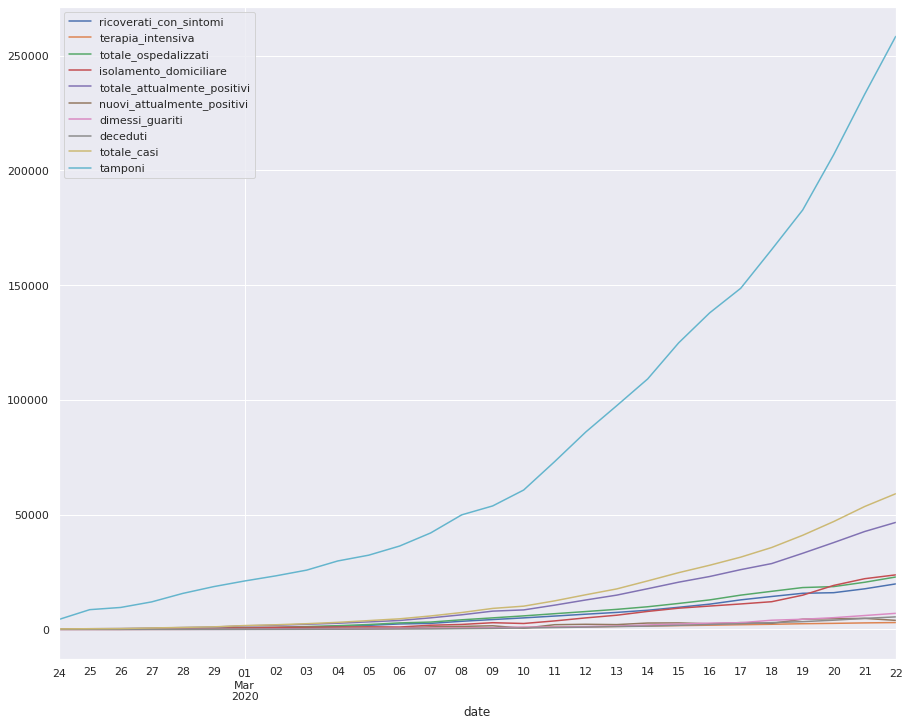

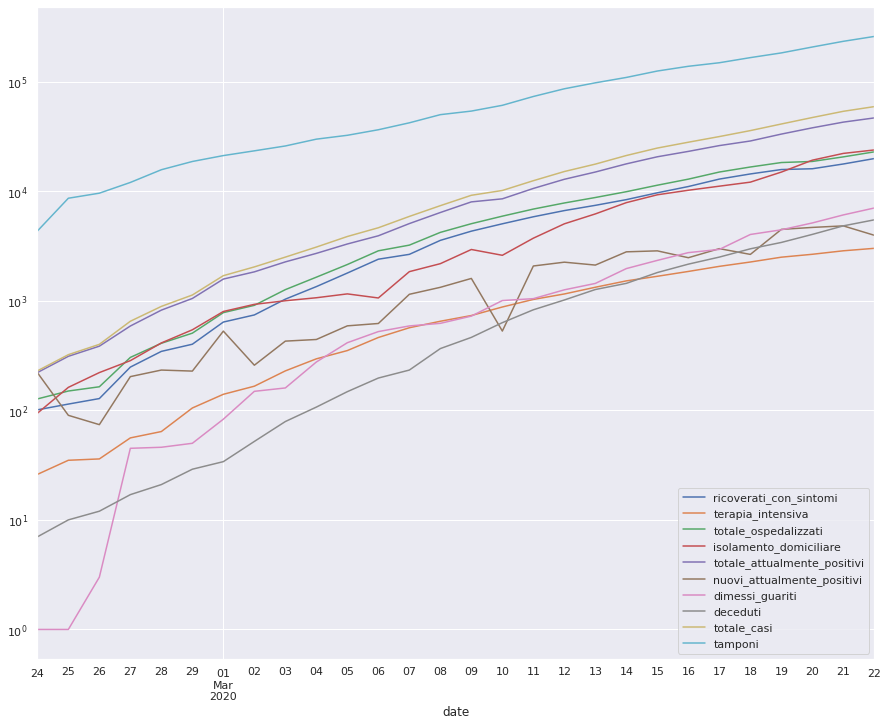

In [95]:
df.plot()
df.plot(logy=True);

In [96]:
deltadf = df.diff().dropna().astype(np.int)
percdf = df.pct_change().dropna()

In [97]:
deltadf.head()

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
date,,,,,,,,,,
2020-02-25,13,9,23,68,90,-131,0,3,93,4299
2020-02-26,14,1,14,59,74,-16,2,2,78,964
2020-02-27,120,20,140,63,203,129,42,5,250,2427
2020-02-28,97,8,105,128,233,30,1,4,238,3681
2020-02-29,56,41,97,131,228,-5,4,8,240,2966


In [98]:
percdf.head()

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
date,,,,,,,,,,
2020-02-25,0.128713,0.346154,0.181102,0.723404,0.407240,-0.592760,0.000000,0.428571,0.406114,0.994218
2020-02-26,0.122807,0.028571,0.093333,0.364198,0.237942,-0.177778,2.000000,0.200000,0.242236,0.111794
2020-02-27,0.937500,0.555556,0.853659,0.285068,0.527273,1.743243,14.000000,0.416667,0.625000,0.253155
2020-02-28,0.391129,0.142857,0.345395,0.450704,0.396259,0.147783,0.022222,0.235294,0.366154,0.306393
2020-02-29,0.162319,0.640625,0.237164,0.317961,0.277710,-0.021459,0.086957,0.380952,0.270270,0.188977


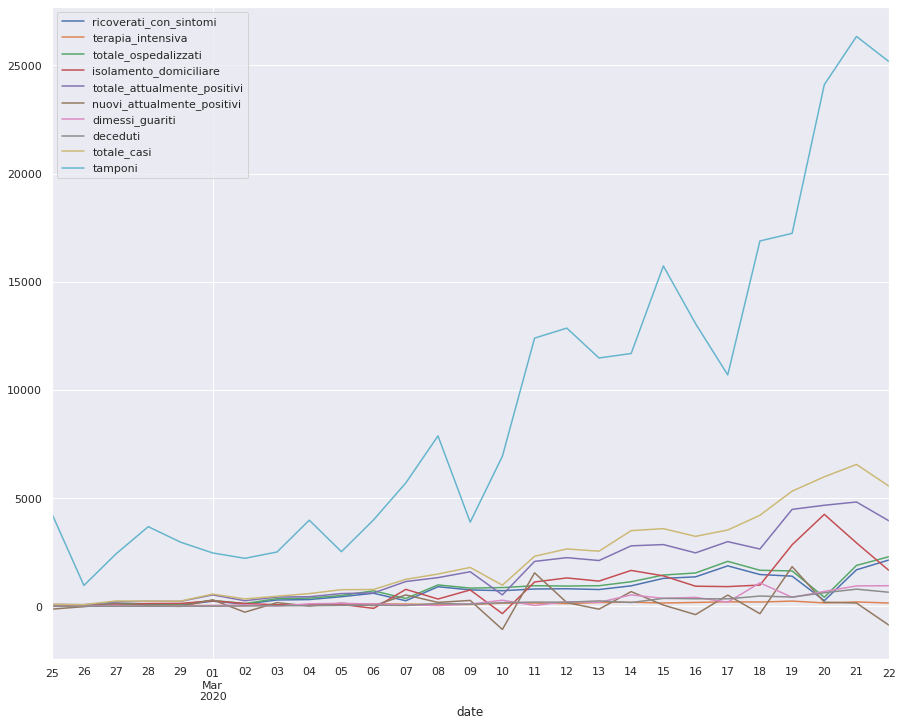

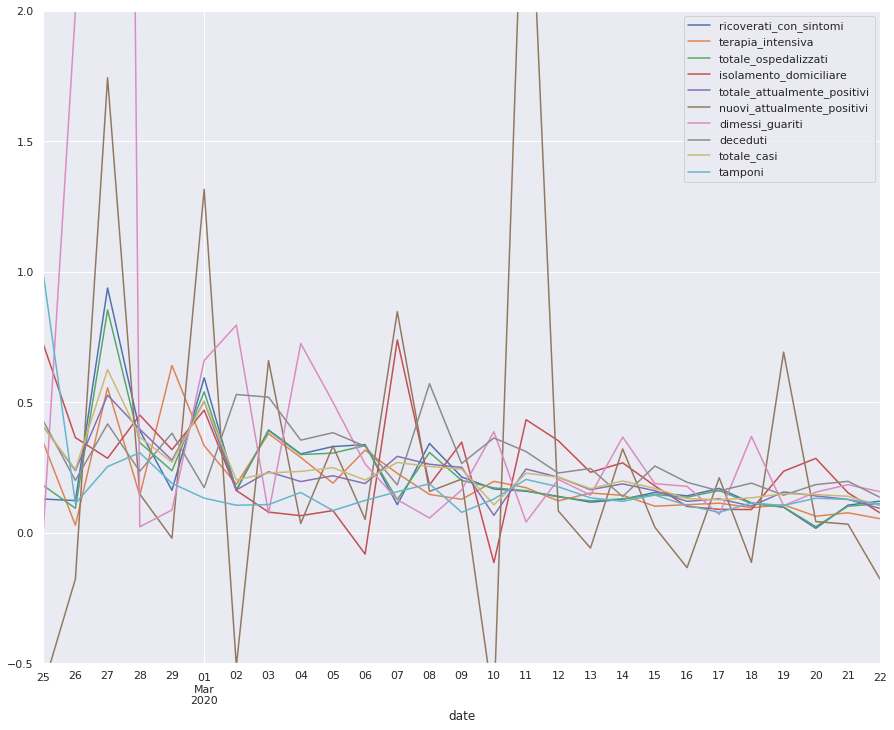

In [108]:
deltadf.plot()
percdf.plot(ylim=(-0.5, 2));

In [102]:
growthdf = pd.DataFrame({'total': df.totale_casi, 'diff1': df.totale_casi.diff(), 'diff2':df.totale_casi.diff().diff()})

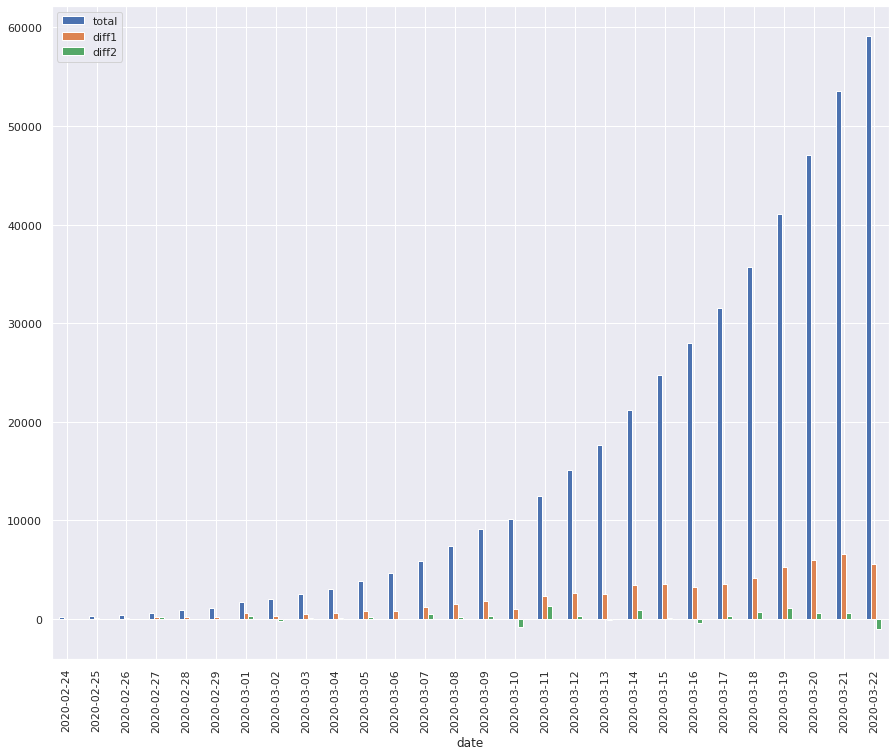

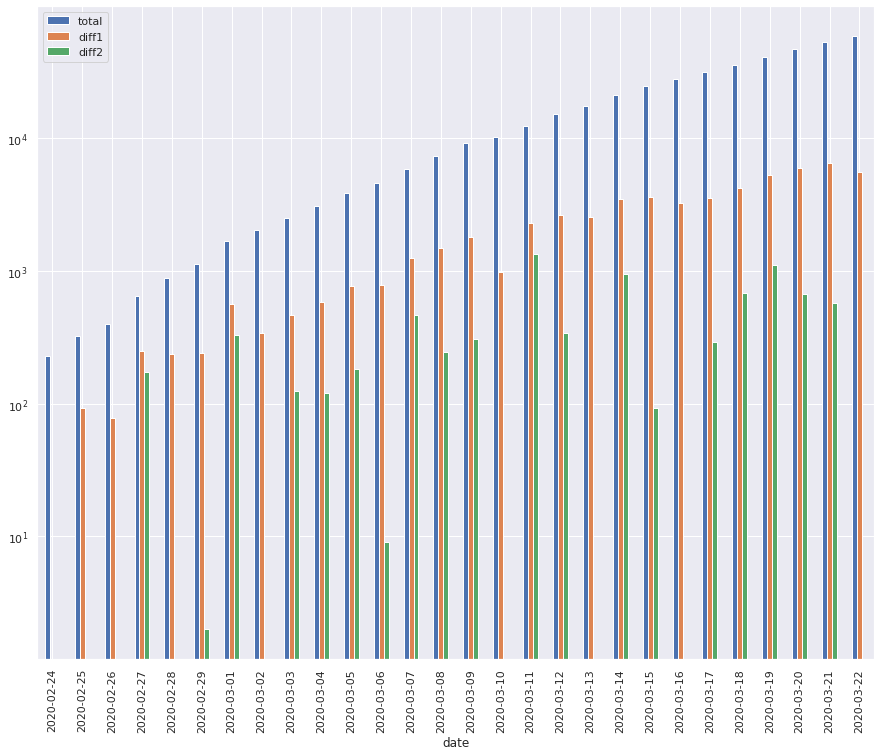

In [114]:
growthdf.plot(kind='bar')
growthdf.plot(kind='bar', logy=True);